In [3]:
# Prepare datasets


In [1]:
!gdown --id 1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk
From (redirected): https://drive.google.com/uc?id=1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk&confirm=t&uuid=8f2cefe6-170b-404e-b92f-955f36e40be6
To: /content/animals10small.zip
100% 46.3M/46.3M [00:01<00:00, 31.9MB/s]


In [2]:
!rm -rf animals10small/
!unzip -q animals10small.zip

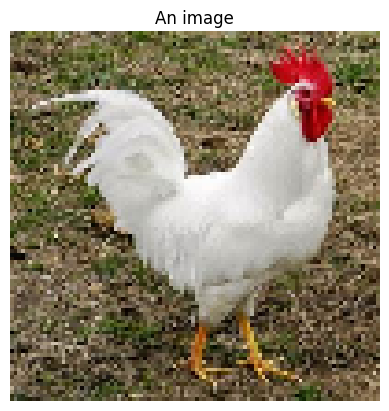

In [86]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def show_image(image, title="An image", figsize=(3,3)):
  plt.figure()
  if image.ndim == 2:
    plt.imshow(image, cmap="gray")
  elif image.ndim == 3:
    plt.imshow(image)
  else:
    raise Exception("Invalid image dimension")

  plt.axis("off")
  plt.title(title)
  plt.show()

path = "animals10small/data"
files = ["chicken/10.jpeg",
         "chicken/100.jpeg",
         "cat/1.jpeg",
         "cat/10.jpeg"]
fnames = [os.path.join(path, fn) for fn in files]
rgb = [cv2.imread(fn, 1) for fn in fnames]
rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in rgb]
rgb = [cv2.resize(im, (100, 100)) for im in rgb]

show_image(rgb[0])

# Broadcasting

In [4]:
import numpy as np


## Add matrix and vector

In [6]:
A = np.random.randint(0, 10, (5, 4))
x = np.random.randint(0, 10, (4, ))
y = np.random.randint(0, 10, (5, ))

print("A + x")
print(A + x)


A + x
[[16  7 10  1]
 [10  4 16  4]
 [11  3  9  2]
 [ 7 11 16  0]
 [14  6  8  5]]


In [7]:
A

array([[9, 4, 3, 1],
       [3, 1, 9, 4],
       [4, 0, 2, 2],
       [0, 8, 9, 0],
       [7, 3, 1, 5]])

In [8]:
x

array([7, 3, 7, 0])

In [10]:
A + y # error

ValueError: operands could not be broadcast together with shapes (5,4) (5,) 

In [11]:
A + y.reshape(-1, 1)

array([[17, 12, 11,  9],
       [11,  9, 17, 12],
       [ 9,  5,  7,  7],
       [ 4, 12, 13,  4],
       [11,  7,  5,  9]])

In [12]:
A

array([[9, 4, 3, 1],
       [3, 1, 9, 4],
       [4, 0, 2, 2],
       [0, 8, 9, 0],
       [7, 3, 1, 5]])

In [13]:
A.mean(axis=-1)

array([4.25, 4.25, 2.  , 4.25, 4.  ])

In [14]:
A.var(axis=-1)

array([ 8.6875,  8.6875,  2.    , 18.1875,  5.    ])

In [16]:
m = A.sum(axis=-1)/A.shape[-1]
m

array([4.25, 4.25, 2.  , 4.25, 4.  ])

In [18]:
Am = A - m.reshape(-1,1)
Am

array([[ 4.75, -0.25, -1.25, -3.25],
       [-1.25, -3.25,  4.75, -0.25],
       [ 2.  , -2.  ,  0.  ,  0.  ],
       [-4.25,  3.75,  4.75, -4.25],
       [ 3.  , -1.  , -3.  ,  1.  ]])

In [20]:
(Am**2).sum(axis=-1)/A.shape[-1]

array([ 8.6875,  8.6875,  2.    , 18.1875,  5.    ])

In [24]:
mm = A.mean(axis=-1)
mm

array([4.25, 4.25, 2.  , 4.25, 4.  ])

In [25]:
mm = A.mean(axis=-1, keepdims =True)
mm.shape

(5, 1)

In [26]:
mm

array([[4.25],
       [4.25],
       [2.  ],
       [4.25],
       [4.  ]])

In [27]:
A

array([[9, 4, 3, 1],
       [3, 1, 9, 4],
       [4, 0, 2, 2],
       [0, 8, 9, 0],
       [7, 3, 1, 5]])

In [28]:
A - mm

array([[ 4.75, -0.25, -1.25, -3.25],
       [-1.25, -3.25,  4.75, -0.25],
       [ 2.  , -2.  ,  0.  ,  0.  ],
       [-4.25,  3.75,  4.75, -4.25],
       [ 3.  , -1.  , -3.  ,  1.  ]])

## Softmax

In [29]:
A

array([[9, 4, 3, 1],
       [3, 1, 9, 4],
       [4, 0, 2, 2],
       [0, 8, 9, 0],
       [7, 3, 1, 5]])

In [35]:
PA = A/A.sum(axis=-1, keepdims=True)
PA

array([[0.52941176, 0.23529412, 0.17647059, 0.05882353],
       [0.17647059, 0.05882353, 0.52941176, 0.23529412],
       [0.5       , 0.        , 0.25      , 0.25      ],
       [0.        , 0.47058824, 0.52941176, 0.        ],
       [0.4375    , 0.1875    , 0.0625    , 0.3125    ]])

In [36]:
PA.sum(axis=-1)

array([1., 1., 1., 1., 1.])

In [33]:
EA = np.exp(A)
EA = EA/EA.sum(axis=-1, keepdims=True)
EA

array([[9.90538219e-01, 6.67419402e-03, 2.45529877e-03, 3.32288554e-04],
       [2.45529877e-03, 3.32288554e-04, 9.90538219e-01, 6.67419402e-03],
       [7.75803493e-01, 1.42093366e-02, 1.04993585e-01, 1.04993585e-01],
       [9.02035197e-05, 2.68892902e-01, 7.30926691e-01, 9.02035197e-05],
       [8.64954877e-01, 1.58422012e-02, 2.14400878e-03, 1.17058913e-01]])

In [34]:
EA.sum(axis=-1)

array([1., 1., 1., 1., 1.])

In [38]:
Z = np.random.randint(1000, 1200, (5, 4))
EZ = np.exp(Z)
EZ

/tmp/ipython-input-2443300951.py:2: RuntimeWarning: overflow encountered in exp
  EZ = np.exp(Z)


array([[inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf]])

In [45]:
def softmax(Z, axis=-1):
  M = np.max(Z, axis=axis, keepdims=True)
  MZ = Z - M # Z: (5, 4); M: (5)
  EZ = np.exp(MZ) # (5, 4)
  return EZ/EZ.sum(axis=axis, keepdims=True)

In [47]:
P = softmax(Z)
P.sum(axis=-1)

array([1., 1., 1., 1., 1.])

## outer product

In [48]:
x

array([7, 3, 7, 0])

In [49]:
y

array([8, 8, 5, 4, 4])

In [50]:
B = y.reshape(-1, 1) * x # (5, 1) (4, ) => (5, 4)

In [51]:
B

array([[56, 24, 56,  0],
       [56, 24, 56,  0],
       [35, 15, 35,  0],
       [28, 12, 28,  0],
       [28, 12, 28,  0]])

In [52]:
Na, Nb = 5, 4
A = np.random.randint(0, 10, (Na, 2))
B = np.random.randint(0, 10, (Nb, 2))
A

array([[0, 7],
       [7, 9],
       [9, 4],
       [2, 7],
       [0, 3]])

In [53]:
B

array([[2, 3],
       [4, 4],
       [1, 1],
       [3, 0]])

In [56]:
D = np.expand_dims(A, axis=1) - np.expand_dims(B, axis=0)
D = np.sqrt((D**2).sum(axis=-1))

In [57]:
D

array([[ 4.47213595,  5.        ,  6.08276253,  7.61577311],
       [ 7.81024968,  5.83095189, 10.        ,  9.8488578 ],
       [ 7.07106781,  5.        ,  8.54400375,  7.21110255],
       [ 4.        ,  3.60555128,  6.08276253,  7.07106781],
       [ 2.        ,  4.12310563,  2.23606798,  4.24264069]])

In [58]:
D.max(), D.argmax()

(np.float64(10.0), np.int64(6))

In [59]:
np.unravel_index(D.argmax(), D.shape)

(np.int64(1), np.int64(2))

In [60]:
X = np.random.randint(0, 10, (8, 2))
X

array([[8, 4],
       [2, 1],
       [2, 2],
       [5, 4],
       [8, 8],
       [6, 1],
       [4, 0],
       [5, 5]])

In [61]:
center = X.mean(axis=0)
center

array([5.   , 3.125])

In [64]:
Dc = np.sqrt(((X - center)**2).sum(axis=-1))

In [65]:
Dc

array([3.125     , 3.67636029, 3.2040014 , 0.875     , 5.72412657,
       2.34853678, 3.28110119, 1.875     ])

In [67]:
theshold = np.percentile(Dc, 75)
theshold

np.float64(3.37991596344205)

In [69]:
mask = Dc < theshold
mask

array([ True, False,  True,  True, False,  True,  True,  True])

In [71]:
A

array([[0, 7],
       [7, 9],
       [9, 4],
       [2, 7],
       [0, 3]])

In [72]:
X[mask]

array([[8, 4],
       [2, 2],
       [5, 4],
       [6, 1],
       [4, 0],
       [5, 5]])

In [73]:
rgb = rgb[0].copy()

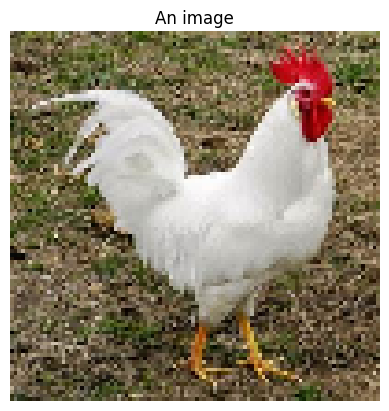

In [74]:
show_image(rgb)

In [75]:
rgb.shape

(100, 100, 3)

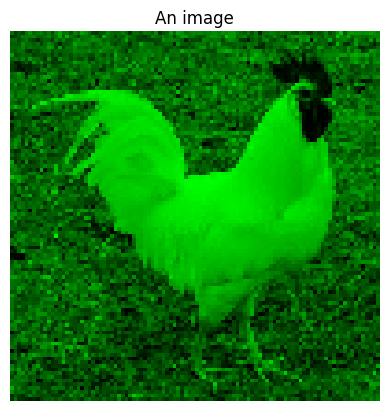

In [77]:
gchannel = rgb.copy()
gchannel[..., (0,2)] = 0
show_image(gchannel)

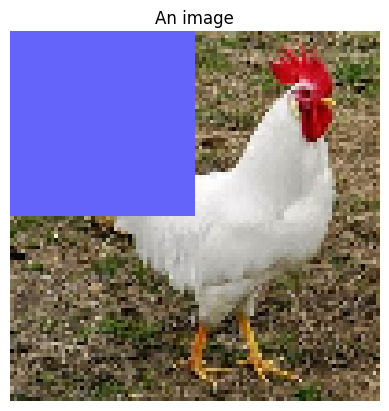

In [83]:
sample = [100, 100, 250]
aimage = rgb.copy()
H, W, _ = aimage.shape
aimage[:H//2, :W//2] = sample
show_image(aimage)


## normalization

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

X = np.random.randint(0, 100, (5, 4))
minmax_scaler = MinMaxScaler(feature_range=(-1, 1))
X_minmax = minmax_scaler.fit_transform(X)
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)


In [93]:
X

array([[96, 16,  0, 33],
       [71, 33, 72,  3],
       [65, 52, 59, 30],
       [88, 84, 81, 83],
       [62, 74,  1,  0]])

In [94]:
X_minmax

array([[ 1.        , -1.        , -1.        , -0.20481928],
       [-0.47058824, -0.5       ,  0.77777778, -0.92771084],
       [-0.82352941,  0.05882353,  0.45679012, -0.27710843],
       [ 0.52941176,  1.        ,  1.        ,  1.        ],
       [-1.        ,  0.70588235, -0.97530864, -1.        ]])

In [95]:
X_std

array([[ 1.47305978, -1.42296721, -1.21435058,  0.10730283],
       [-0.405843  , -0.74725653,  0.83807294, -0.89866121],
       [-0.85677967,  0.00794954,  0.46749647,  0.00670643],
       [ 0.87181089,  1.27987554,  1.09462588,  1.78390957],
       [-1.082248  ,  0.88239866, -1.1858447 , -0.99925762]])

In [96]:
N = 100000
mu, std = 5, 3
x = np.random.normal(mu, std, (N, ))
x.shape


(100000,)

In [97]:
x.mean(), x.std()

(np.float64(5.000613590146889), np.float64(2.997155657504079))

In [98]:
x_norm = (x - x.mean())/x.std() # standard normalization
x_norm.mean(), x_norm.std()

(np.float64(-2.7004176672562606e-16), np.float64(1.0))

## Batch norm

In [99]:
batch = np.stack(rgb)
batch.shape

(4, 100, 100, 3)

In [100]:
mu, std = batch.mean(axis=(0, 1, 2)), batch.std(axis=(0, 1, 2))
mu, std

(array([159.4179, 136.169 , 104.7383]),
 array([64.09526979, 68.1979394 , 75.02178059]))

In [101]:
batch_norm = (batch - mu)/std
batch_norm.mean(), batch_norm.std()

(np.float64(-2.2737367544323207e-17), np.float64(0.9999999999999759))

In [102]:
batch_torch = np.transpose(batch, (0, 3, 1, 2))
batch_torch.shape

(4, 3, 100, 100)

In [105]:
mu, std = batch_torch.mean(axis=(0,2,3), keepdims=True), batch_torch.std(axis=(0,2,3), keepdims=True)
mu.shape, std.shape


((1, 3, 1, 1), (1, 3, 1, 1))

In [107]:
batch_norm = (batch_torch - mu)/std
batch_norm.mean(), batch_norm.std()

(np.float64(-2.2737367544323207e-17), np.float64(0.9999999999999759))

## LayerNorm

In [111]:
X = np.random.randint(0, 10, (15, 5))
X.shape

(15, 5)

In [112]:
X

array([[5, 9, 1, 1, 8],
       [7, 1, 5, 5, 9],
       [9, 7, 6, 5, 7],
       [6, 3, 7, 1, 3],
       [4, 0, 9, 5, 6],
       [0, 6, 9, 2, 9],
       [6, 6, 6, 7, 3],
       [3, 3, 6, 6, 6],
       [4, 8, 4, 8, 2],
       [2, 5, 4, 3, 5],
       [7, 0, 6, 9, 6],
       [0, 4, 4, 4, 6],
       [3, 2, 9, 9, 5],
       [6, 3, 0, 0, 4],
       [5, 7, 2, 0, 1]])

In [113]:
mu, std = X.mean(axis=-1, keepdims=True), X.std(axis=-1, keepdims=True)
mu.shape, std.shape

((15, 1), (15, 1))

In [114]:
X_norm = (X - mu)/std
X_norm.shape

(15, 5)

In [116]:
N, S, D = 10, 20, 5
X = np.random.randint(0, 10, (N, S, D))
X.shape

(10, 20, 5)

In [117]:
mu, std = X.mean(axis=-1, keepdims=True), X.std(axis=-1, keepdims=True)
mu.shape, std.shape

((10, 20, 1), (10, 20, 1))

### BatchNorm2D - torch

In [128]:
import torch
import torch.nn as nn
# (BatchSize, Channel, Height, Width): (N, C, H, W)

# With Learnable Parameters
m = nn.BatchNorm2d(100)
# Without Learnable Parameters
#m = nn.BatchNorm2d(100, affine=False)
input = torch.randn(20, 100, 35, 45)
output = m(input)


In [129]:
input.shape

torch.Size([20, 100, 35, 45])

In [130]:
output.shape

torch.Size([20, 100, 35, 45])

In [132]:
m.weight.shape # Gamma

torch.Size([100])

In [133]:
m.bias.shape

torch.Size([100])

In [137]:
a = np.random.randint(0, 100, (5, ))
a

array([96, 55, 47, 59, 61])

In [138]:
np.repeat(a, 3)

array([96, 96, 96, 55, 55, 55, 47, 47, 47, 59, 59, 59, 61, 61, 61])

In [139]:
classidx = np.array([1, 2, 3])
counts = np.array([3, 4, 5])
np.repeat(classidx, counts)



array([1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3])